<a href="https://colab.research.google.com/github/vimalkumarasamy/computer_vision/blob/master/CV_Task2_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
cd /content/gdrive/My Drive/Computer_Vision

/content/gdrive/My Drive/Computer_Vision


In [4]:
ls

a_dup.JPG  b.jpg  joey.jpg         proj1-task2-png.png  task1.py  utils.py
a.jpg      c.jpg  proj1-task1.jpg  __pycache__/         task2.py  w.jpg


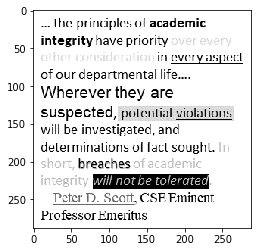

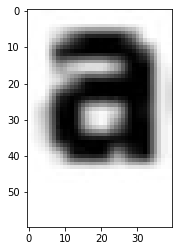

In [7]:
import utils 
import numpy as np
import copy
import cv2
import argparse
import os
import matplotlib.pyplot as plt
from task1 import *

img_path='proj1-task2-png.png'
img=read_image(img_path)
img_path='a.jpg'
template=read_image(img_path)

plt.imshow(img, cmap="gray")
plt.show()
plt.imshow(template, cmap="gray")
plt.show()

In [0]:
# Max pooling to reduce the size of the image 
# 3 X 3 to 2 X 2 

In [0]:
# This code is to compute the histogram of gradients in a given picture

import math
hogs_x=[-1,1]
hogs_img_x=copy.deepcopy(img)
hogs_grad_x=copy.deepcopy(img)
for i in range(len(hogs_img_x)):
  hogs_img_x[i]=hogs_img_x[i]+[0]
hogs_y=[1,-1]
hogs_img_y=copy.deepcopy(img)
hogs_grad_y=copy.deepcopy(img)
hogs_img_y=hogs_img_y+(np.zeros((1, len(hogs_img_y[0]))).tolist())

for i in range(len(img)):
  for j in range(len(img[0])):
    hogs_grad_x[i][j]=(hogs_img_x[i][j]*hogs_x[0])+(hogs_img_x[i][j+1]*hogs_x[1])
    hogs_grad_y[i][j]=(hogs_img_y[i][j]*hogs_y[0])+(hogs_img_y[i+1][j]*hogs_y[1])

# hogs_grad_x=normalize(hogs_grad_x)
# hogs_grad_y=normalize(hogs_grad_y)
hogs_grad=copy.deepcopy(img)
for i in range(len(hogs_grad)):
  for j in range(len(hogs_grad[0])):
    if hogs_grad_x[i][j]==0:
      hogs_grad[i][j]=math.pi/2
    else:
      if hogs_grad_x[i][j]<0 or hogs_grad_y[i][j]<0:
        hogs_grad[i][j]=(math.atan(abs(hogs_grad_y[i][j]/hogs_grad_x[i][j]))+(math.pi/2))
      else:
        hogs_grad[i][j]=math.atan(abs(hogs_grad_y[i][j]/hogs_grad_x[i][j]))

    





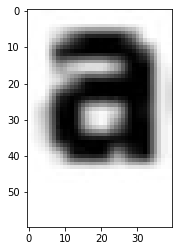

[0.37,
 0.10458333333333333,
 0.09208333333333334,
 0.07083333333333333,
 0.13208333333333333,
 0.08833333333333333,
 0.09375,
 0.04833333333333333]

In [105]:
img_path='a.jpg'
img=read_image(img_path)
plt.imshow(img, cmap="gray")
plt.show()

import math
import numpy as np
hogs_x=[-1,1]
hogs_img_x=copy.deepcopy(img)
hogs_grad_x=copy.deepcopy(img)
for i in range(len(hogs_img_x)):
  hogs_img_x[i]=hogs_img_x[i]+[0]
hogs_y=[1,-1]
hogs_img_y=copy.deepcopy(img)
hogs_grad_y=copy.deepcopy(img)
hogs_img_y=hogs_img_y+(np.zeros((1, len(hogs_img_y[0]))).tolist())

for i in range(len(img)):
  for j in range(len(img[0])):
    hogs_grad_x[i][j]=(hogs_img_x[i][j]*hogs_x[0])+(hogs_img_x[i][j+1]*hogs_x[1])
    hogs_grad_y[i][j]=(hogs_img_y[i][j]*hogs_y[0])+(hogs_img_y[i+1][j]*hogs_y[1])

hogs_grad=copy.deepcopy(img)
hogs_hist=np.zeros(8).tolist()
for i in range(len(hogs_grad)):
  for j in range(len(hogs_grad[0])):
    R=abs(hogs_grad_y[i][j]/(hogs_grad_x[i][j]+0.000000000001))
    if hogs_grad_x[i][j]<0 and hogs_grad_y[i][j]>=0:
      hogs_grad[i][j]=(math.pi-(math.atan(R)))//(math.pi/4)
      hogs_hist[int((math.pi-(math.atan(R)))//(math.pi/4))]+=1
    elif hogs_grad_x[i][j]>=0 and hogs_grad_y[i][j]<0:
      hogs_grad[i][j]=((2*math.pi)-(math.atan(R)) )//(math.pi/4)
      hogs_hist[int(((2*math.pi)-(math.atan(R)) )//(math.pi/4))]+=1
    elif hogs_grad_x[i][j]<0 and hogs_grad_y[i][j]<0:
      hogs_grad[i][j]=(math.pi+(math.atan(R)))//(math.pi/4)
      hogs_hist[int((math.pi+(math.atan(R)))//(math.pi/4))]+=1
    else:
      hogs_grad[i][j]=(math.atan(R))//(math.pi/4)
      hogs_hist[int((math.atan(R))//(math.pi/4))]+=1


s=sum(hogs_hist)     
hogs_hist_per=[i/s for i in hogs_hist]

hogs_hist_per


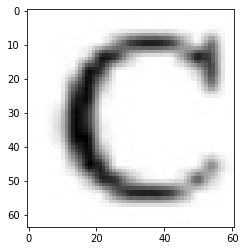

[0.41521516393442626,
 0.13063524590163936,
 0.05737704918032787,
 0.054047131147540985,
 0.12064549180327869,
 0.048924180327868855,
 0.08913934426229508,
 0.08401639344262295]

In [116]:
img_path='c.jpg'
img=read_image(img_path)
plt.imshow(img, cmap="gray")
plt.show()

import math
import numpy as np
hogs_x=[-1,1]
hogs_img_x=copy.deepcopy(img)
hogs_grad_x=copy.deepcopy(img)
for i in range(len(hogs_img_x)):
  hogs_img_x[i]=hogs_img_x[i]+[0]
hogs_y=[1,-1]
hogs_img_y=copy.deepcopy(img)
hogs_grad_y=copy.deepcopy(img)
hogs_img_y=hogs_img_y+(np.zeros((1, len(hogs_img_y[0]))).tolist())

for i in range(len(img)):
  for j in range(len(img[0])):
    hogs_grad_x[i][j]=(hogs_img_x[i][j]*hogs_x[0])+(hogs_img_x[i][j+1]*hogs_x[1])
    hogs_grad_y[i][j]=(hogs_img_y[i][j]*hogs_y[0])+(hogs_img_y[i+1][j]*hogs_y[1])
hogs_grad=copy.deepcopy(img)
hogs_hist=np.zeros(8).tolist()
for i in range(len(hogs_grad)):
  for j in range(len(hogs_grad[0])):
    R=abs(hogs_grad_y[i][j]/(hogs_grad_x[i][j]+0.000000000001))
    if hogs_grad_x[i][j]<0 and hogs_grad_y[i][j]>=0:
      hogs_grad[i][j]=(math.pi-(math.atan(R)))//(math.pi/4)
      hogs_hist[int((math.pi-(math.atan(R)))//(math.pi/4))]+=1
    elif hogs_grad_x[i][j]>=0 and hogs_grad_y[i][j]<0:
      hogs_grad[i][j]=((2*math.pi)-(math.atan(R)) )//(math.pi/4)
      hogs_hist[int(((2*math.pi)-(math.atan(R)) )//(math.pi/4))]+=1
    elif hogs_grad_x[i][j]<0 and hogs_grad_y[i][j]<0:
      hogs_grad[i][j]=(math.pi+(math.atan(R)))//(math.pi/4)
      hogs_hist[int((math.pi+(math.atan(R)))//(math.pi/4))]+=1
    else:
      hogs_grad[i][j]=(math.atan(R))//(math.pi/4)
      hogs_hist[int((math.atan(R))//(math.pi/4))]+=1
s=sum(hogs_hist)     
hogs_hist_per=[i/s for i in hogs_hist]
hogs_hist_per


In [89]:
val_max=-1
val_min=300
for i in hogs_grad:
  for j in i:
    if j>val_max:
      val_max=j
    if j<val_min:
      val_min=j
print(val_max)
print(val_min)


7.0
0.0


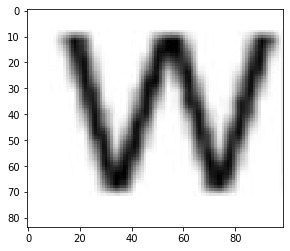

In [114]:
img_path='w.jpg'
img=read_image(img_path)
plt.imshow(img, cmap="gray")
plt.show()

In [0]:
def hogs(img):
  import math
  import numpy as np
  hogs_x=[-1,1]
  hogs_img_x=copy.deepcopy(img)
  hogs_grad_x=copy.deepcopy(img)
  for i in range(len(hogs_img_x)):
    hogs_img_x[i]=hogs_img_x[i]+[0]
  hogs_y=[1,-1]
  hogs_img_y=copy.deepcopy(img)
  hogs_grad_y=copy.deepcopy(img)
  hogs_img_y=hogs_img_y+(np.zeros((1, len(hogs_img_y[0]))).tolist())

  for i in range(len(img)):
    for j in range(len(img[0])):
      hogs_grad_x[i][j]=(hogs_img_x[i][j]*hogs_x[0])+(hogs_img_x[i][j+1]*hogs_x[1])
      hogs_grad_y[i][j]=(hogs_img_y[i][j]*hogs_y[0])+(hogs_img_y[i+1][j]*hogs_y[1])
  hogs_grad=copy.deepcopy(img)
  hogs_hist=np.zeros(8).tolist()
  for i in range(len(hogs_grad)):
    for j in range(len(hogs_grad[0])):
      R=abs(hogs_grad_y[i][j]/(hogs_grad_x[i][j]+0.000000000001))
      if hogs_grad_x[i][j]<0 and hogs_grad_y[i][j]>=0:
        hogs_grad[i][j]=(math.pi-(math.atan(R)))//(math.pi/4)
        hogs_hist[int((math.pi-(math.atan(R)))//(math.pi/4))]+=1
      elif hogs_grad_x[i][j]>=0 and hogs_grad_y[i][j]<0:
        hogs_grad[i][j]=((2*math.pi)-(math.atan(R)) )//(math.pi/4)
        hogs_hist[int(((2*math.pi)-(math.atan(R)) )//(math.pi/4))]+=1
      elif hogs_grad_x[i][j]<0 and hogs_grad_y[i][j]<0:
        hogs_grad[i][j]=(math.pi+(math.atan(R)))//(math.pi/4)
        hogs_hist[int((math.pi+(math.atan(R)))//(math.pi/4))]+=1
      else:
        hogs_grad[i][j]=(math.atan(R))//(math.pi/4)
        hogs_hist[int((math.atan(R))//(math.pi/4))]+=1
  s=sum(hogs_hist)     
  hogs_hist_per=[i/s for i in hogs_hist]
  return(hogs_hist_per)


In [10]:
img_path='b.jpg'
img=read_image(img_path)
hogs(img)

[0.44813829787234044,
 0.07180851063829788,
 0.02526595744680851,
 0.04521276595744681,
 0.19946808510638298,
 0.04680851063829787,
 0.06542553191489361,
 0.09787234042553192]

In [0]:
# Iterating through the image and computing the eulidean distance match score
img_path='proj1-task2-png.png'
img=read_image(img_path)
img_path='a.jpg'
template=read_image(img_path)


In [0]:
def euclidean(arr1,arr2):
  summ=0
  for i in range(len(arr1)):
    summ+=(arr1[i]-arr2[i])**2
  return summ**0.5


In [0]:
t_l=len(template)
t_b=len(template[0])
i_l=len(img)
i_b=len(img[0])
hogs_match=np.zeros((i_l-t_l,i_b-t_b)).tolist()
hogs_template=hogs(template)
img_np=np.array(img)
for i in range(i_l-t_l):
  for j in range(i_b-t_b):
    hogs_match[i][j]=euclidean(hogs(img_np[i:i+t_l,j:j+t_b].tolist()),hogs_template)
    



In [55]:
len(hogs_match)

226

In [29]:
2**0.5

1.4142135623730951

In [0]:
hogs_template=hogs(template)

TypeError: ignored